In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('../data/train_set.csv')

In [6]:
print(data.head())
print('-'*100)
vendors = data.Vendor_Code.nunique()
Product_Categories = data.Product_Category.nunique()
print('Number of data points in Train:', len(data))
print('Number of Unique Vendors in Train set:', vendors)
print('Number of Unique Product Categories in Train set:', Product_Categories)

   Inv_Id  Vendor_Code     GL_Code  Inv_Amt  \
0   15001  VENDOR-1676  GL-6100410    83.24   
1   15002  VENDOR-1883  GL-2182000    51.18   
2   15004  VENDOR-1999  GL-6050100    79.02   
3   15005  VENDOR-1771  GL-6101400    48.50   
4   15006  VENDOR-1331  GL-2182000    63.35   

                                    Item_Description Product_Category  
0  Artworking/Typesetting Production Jun 2009 Cha...       CLASS-1963  
1  Auto Leasing Corporate Services Corning Inc /N...       CLASS-1250  
2  Store Management Lease/Rent Deltona Corp Real ...       CLASS-1274  
3  Store Construction General Requirements Coloni...       CLASS-1522  
4  Jul 2015 Aydin Corp Contingent Labor/Temp Labo...       CLASS-1376  
----------------------------------------------------------------------------------------------------
Number of data points in Train: 5288
Number of Unique Vendors in Train set: 1206
Number of Unique Product Categories in Train set: 36


In [7]:
#Splitting the data before analysis
train, test = train_test_split(data ,test_size=0.30,random_state = 1)

Analysing Vendors

In [8]:
#Looking at the top 5 vendors
train.Vendor_Code.value_counts()[:5]

Vendor_Code
VENDOR-1883    232
VENDOR-1513    158
VENDOR-1551    126
VENDOR-2513    120
VENDOR-1944    114
Name: count, dtype: int64

In [9]:
#Looking at the counts of vendors with least records
train.Vendor_Code.value_counts().value_counts().sort_index()[:5]

count
1    594
2    164
3     84
4     37
5     16
Name: count, dtype: int64

In [10]:
#Looking at the counts of vendors with highest records
train.Vendor_Code.value_counts().value_counts().sort_index()[-5:]

count
114    1
120    1
126    1
158    1
232    1
Name: count, dtype: int64

In [11]:
print('Q. Can a same vendor provide multiple category products?')
print(train.groupby('Vendor_Code')['Product_Category'].nunique().value_counts())
print('A. In Mejority cases its a no!, but very few vendors distribute products in multiple categories')

Q. Can a same vendor provide multiple category products?
Product_Category
1    933
2     38
3      5
4      1
5      1
Name: count, dtype: int64
A. In Mejority cases its a no!, but very few vendors distribute products in multiple categories


In [12]:
print('Q. Is there significant difference in avg inv amount if a vendor distributes more than one category product?')
vendors_with_multiple_category_products = train.groupby('Vendor_Code').Vendor_Code.unique()[train.groupby('Vendor_Code')['Product_Category'].nunique() > 1].index
print(train.groupby(data.Vendor_Code.isin(vendors_with_multiple_category_products)).Inv_Amt.mean(), train.groupby(train.Vendor_Code.isin(vendors_with_multiple_category_products)).Inv_Amt.std())
print('A. No these isnt significant difference in inv amount based on if a vendor supplies more than one category product')

Q. Is there significant difference in avg inv amount if a vendor distributes more than one category product?
Vendor_Code
False    49.210011
True     51.037196
Name: Inv_Amt, dtype: float64 Vendor_Code
False    28.967175
True     28.752507
Name: Inv_Amt, dtype: float64
A. No these isnt significant difference in inv amount based on if a vendor supplies more than one category product


Analysing GL_Code

In [25]:
print('Unique Ledger codes:', train.GL_Code.nunique())
print('Count of each ledger code:')
print(train.GL_Code.value_counts())

Unique Ledger codes: 9
Count of each ledger code:
GL_Code
GL-6050310    1090
GL-2182000     870
GL-6050100     630
GL-6101400     532
GL-6100410     263
GL-6100500     140
GL-6060100     103
GL-6121905      55
GL-6020600      18
Name: count, dtype: int64


Analysing Invoice Amount

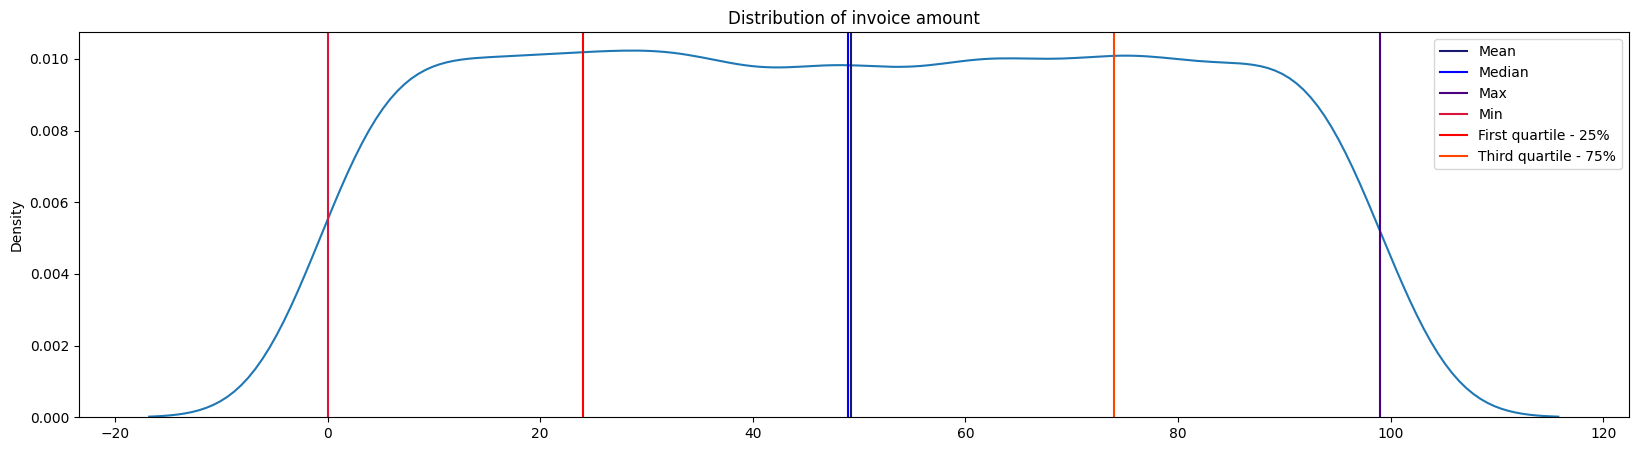

In [13]:
plt.figure(figsize = (20,5))
plt.title('Distribution of invoice amount')
series = np.array(train.Inv_Amt, dtype=int)
sn.kdeplot(series)
plt.axvline(series.mean(),color='midnightblue',label='Mean')    
plt.axvline(np.median(series),color='blue',label='Median')
plt.axvline(series.max(),color='indigo',label='Max')
plt.axvline(series.min(),color='crimson',label='Min')
plt.axvline(np.quantile(series, 0.25),color='red',label='First quartile - 25%')
plt.axvline(np.quantile(series, 0.75),color='orangered',label='Third quartile - 75%')
plt.legend()
plt.show()

Q. Do we see any relation between invoice amount and product category?
0.23869472984823462
Yes!, we see a 21% standerd deviation in mean invoice amount based on product category.


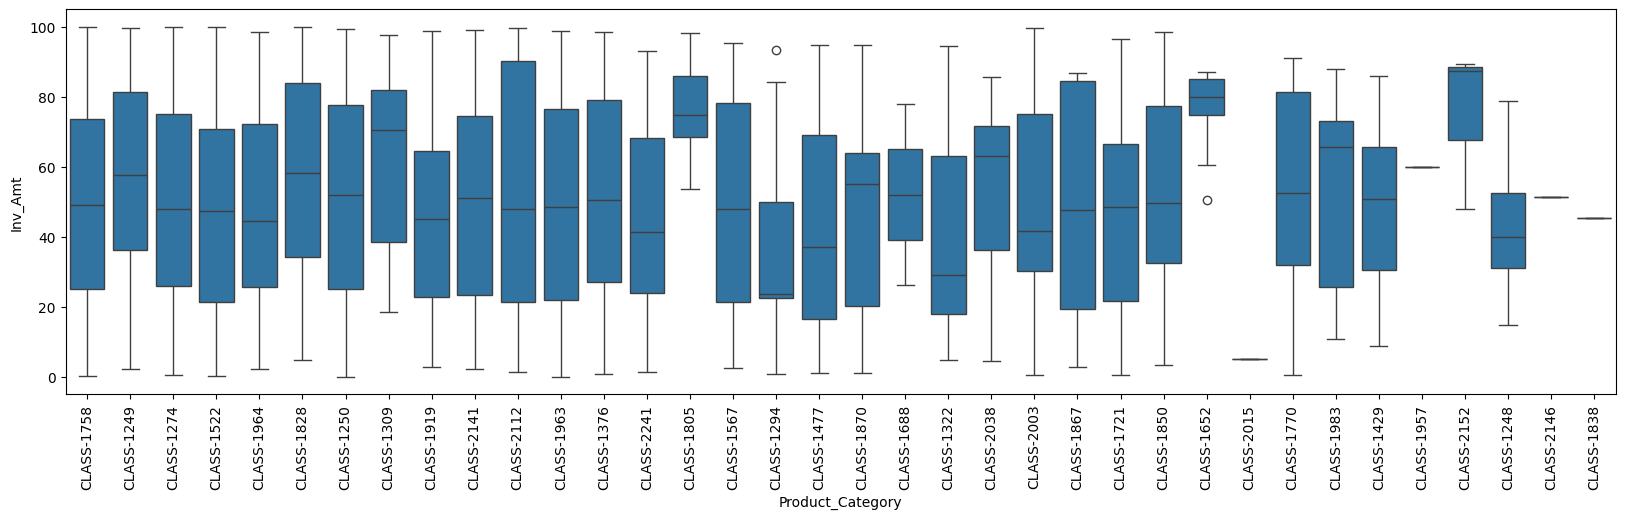

In [14]:
print('Q. Do we see any relation between invoice amount and product category?')
print(train.groupby('Product_Category').Inv_Amt.mean().std()/train.groupby('Product_Category').Inv_Amt.mean().mean())
print('Yes!, we see a 21% standerd deviation in mean invoice amount based on product category.')
plt.figure(figsize = (20,5))
sn.boxplot(x="Product_Category", y="Inv_Amt", data=train)
plt.xticks(rotation = 90)
plt.show()

In [15]:
print('Looking at the product with least invoice amount to check if its an anomaly')
train[train.Inv_Amt == train.Inv_Amt.min()]

Looking at the product with least invoice amount to check if its an anomaly


,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
416,15620,VENDOR-1400,GL-6100410,0.01,Prototype and Comp Production/Packaging Design...,CLASS-1963


In [16]:
print('Checking the products with same category.')
train[train.Product_Category == 'CLASS-1963'].head()

Checking the products with same category.


,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
4902,22420,VENDOR-1676,GL-6100410,97.24,Dec-2009 Champion Parts Inc Prototype and Comp...,CLASS-1963
3352,20101,VENDOR-2197,GL-6100410,90.43,Entwistle Co Prototype and Comp Production/Pac...,CLASS-1963
4444,21737,VENDOR-2120,GL-6100410,12.87,Production SMAP Artworking/Typesetting Prototy...,CLASS-1963
1877,17879,VENDOR-1676,GL-6100410,8.19,Prototype and Comp Production/Packaging Design...,CLASS-1963
2479,18761,VENDOR-1676,GL-6100410,81.50,Mar2003 Champion Parts Inc Prototype and Comp ...,CLASS-1963


Analysing Item_Description

Q. Is there any information in length of description?


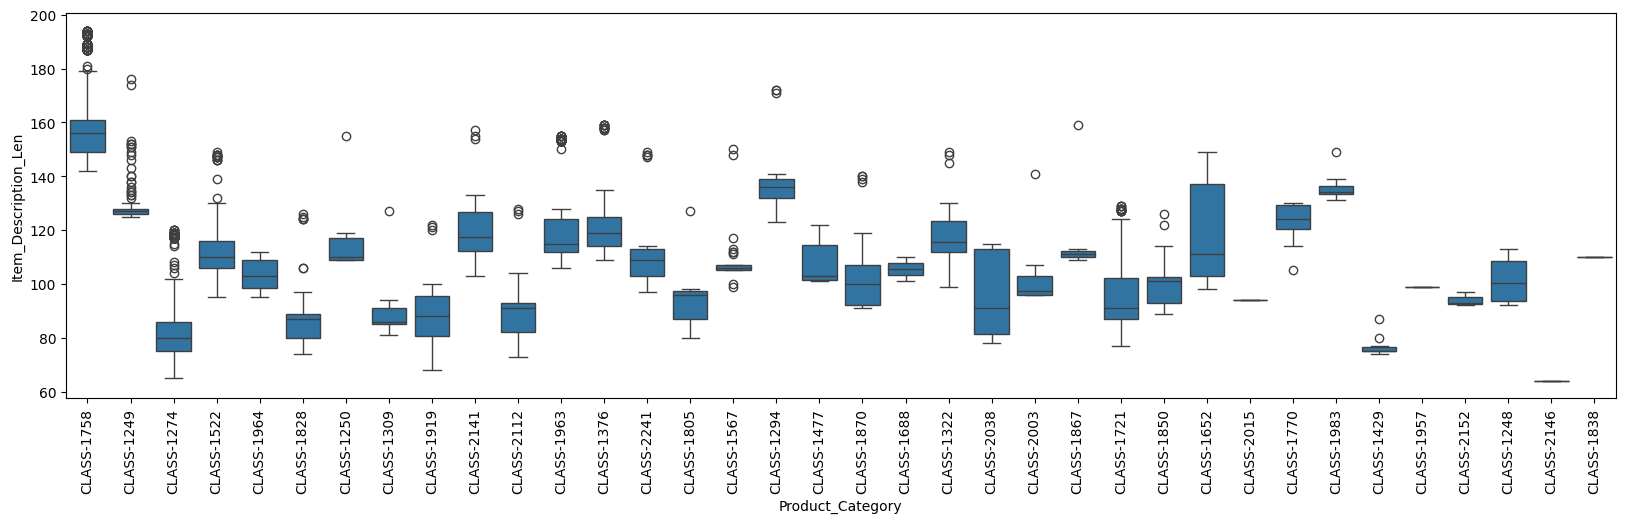

Yes there is information in length of description.


In [17]:
print('Q. Is there any information in length of description?')
train['Item_Description_Len'] = train.Item_Description.str.len()
plt.figure(figsize = (20,5))
sn.boxplot(x="Product_Category", y="Item_Description_Len", data=train)
plt.xticks(rotation = 90)
plt.show()
print('Yes there is information in length of description.')

In [18]:
def preprocess_txt(inp):
    inp = inp.astype(str)
    inp = inp.replace(r'\w*\d\w*', '', regex=True)
    inp = inp.replace(r'\d+', '', regex=True)  # Remove numbers
    inp = inp.replace(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b', '', regex=True)  # Remove dates
    inp = inp.replace(r'[^\w\s]', ' ', regex=True)  # Remove special characters
    inp = inp.str.strip()  # Remove leading/trailing whitespaces
    inp = inp.str.lower()
    inp = inp.replace(r'([a-z])\1+', '', regex=True)    # Use str.replace() with a regular expression pattern to remove repeated single letters
    inp = inp.replace(r' +', ' ', regex=True)

    return inp

In [19]:
train['Item_Description_Preprocessed'] = preprocess_txt(train.Item_Description)

Q. Is the information quality increased in length of description after preprocessing text?


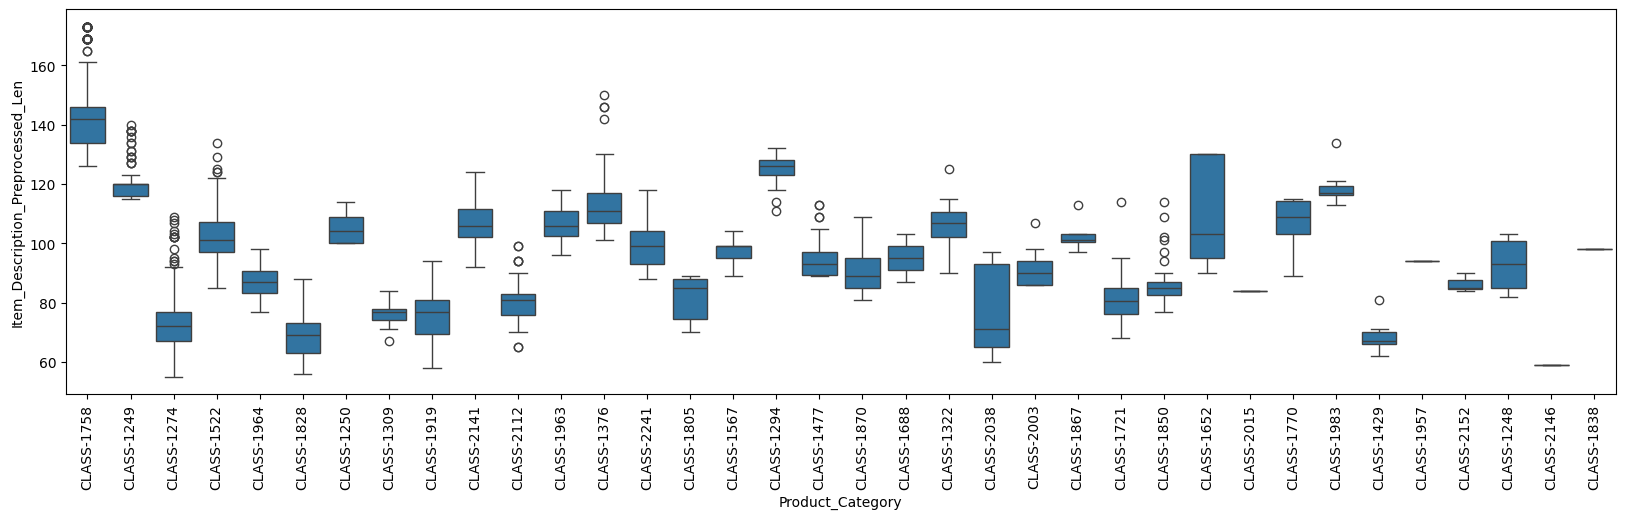

Yes! as we can see lesser outliers in the data now.


In [20]:
print('Q. Is the information quality increased in length of description after preprocessing text?')
train['Item_Description_Preprocessed_Len'] = train.Item_Description_Preprocessed.str.len()
plt.figure(figsize = (20,5))
sn.boxplot(x="Product_Category", y="Item_Description_Preprocessed_Len", data=train)
plt.xticks(rotation = 90)
plt.show()
print('Yes! as we can see lesser outliers in the data now.')

Q. With the description is it possible to club the products into categories?

In [21]:
for i in range(len(train[train.Product_Category == 'CLASS-1248'])):
    print(train[train.Product_Category == 'CLASS-1248'].Item_Description.iloc[i])

Audit & Risk Consulting Corporate Services Avalon Corp 2019Feb Finance Consulting Consulting
Consulting Finance Consulting Audit & Risk Consulting Carter Day Industries Inc May 2007 Corporate Services
2001-Apr  Avalon Corp Audit & Risk Consulting Finance Consulting Corporate Services Consulting
Combined Insurance Co Of America Dec2011 Corporate Services Consulting Finance Consulting Audit & Risk Consulting


In [22]:
for i in range(len(train[train.Product_Category == 'CLASS-1249'].head(5))):
    print(train[train.Product_Category == 'CLASS-1249'].Item_Description.iloc[i])

Corporate Services Auto Fleet Repair and Maintenance Other Corporate Services Auto Leasing and Maintenance Jun 2010 First American Corp /Tn/
Other Corporate Services Corporate Services Auto Leasing and Maintenance Auto Fleet Repair and Maintenance May2000 Daly John J
Auto Fleet Repair and Maintenance Corporate Services Aeire Corp Oct-2001 Auto Leasing and Maintenance Other Corporate Services
Daly John J Auto Fleet Repair and Maintenance May2011 Auto Leasing and Maintenance Other Corporate Services Corporate Services
Auto Fleet Repair and Maintenance Corporate Services Daly John J 2008Oct Auto Leasing and Maintenance Other Corporate Services


A. Yes! it is possible to club the products into categories based on their description